# Regresión

Autores:
- Sergio de la Cruz
- Pablo Ramiro Foronda
- Luciano Pereyra

# Enunciado

En esta práctica, se os proporcionará un conjunto de datos con características de automóviles de segunda mano en distintos países. El objetivo es preprocesar los datos y construir un modelo capaz de predecir los precios de coches que nunca haya visto.

Además, se llevará a cabo una **competición** en kaggle, podéis inscribiros en este siguiente [enlace](https://www.kaggle.com/t/95194d38b1f9447fa9e3b51b8e9d575f)




La estructura del proyecto debe ser la siguiente:

- Carga y limpieza de los datos
- Visualización
- Preprocesamiento
- Pruebas de modelos (razonar sobre los resultados)
- Conclusiones
- Creación de submission



Se valorarán:

- Número y variedad de experimentos con sus conclusiones.
- Calidad del preprocesamiento (y su razonamiento).
- Capacidad de generalización del modelo final.
- Trabajo en equipo (en grupos de más de 1 integrante, claro).
- Creatividad en la solución.
- Claridad del .ipynb presentado en Moodle

# Carga y limpieza de los datos


Aunque se permite la carga de los datos de forma local, se recomienda emplear las siguientes URLs de gist por comodidad:

In [1073]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt
import re

In [1074]:
train_url = "https://gist.githubusercontent.com/w-dan/9c2f9a30d0517c58a08d5a7ef42ef2dd/raw/ee85f61926c9aeae5863369a13bb67e182a702ba/training.csv"
test_url = "https://gist.githubusercontent.com/w-dan/9c2f9a30d0517c58a08d5a7ef42ef2dd/raw/ee85f61926c9aeae5863369a13bb67e182a702ba/test.csv"

In [1075]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [1076]:
pd.set_option('display.max_columns', None)
train_df.head(20)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Chevrolet Spark 1.0 LT,2011,130000,68519,Petrol,Dealer,Manual,First Owner,16.2 kmpl,995 CC,62.1 bhp,90.3Nm@ 4200rpm,5.0
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,1050000,70000,Diesel,Dealer,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
2,3,Mahindra Scorpio S10 7 Seater,2016,1100000,60000,Diesel,Individual,Manual,First Owner,15.4 kmpl,2179 CC,120 bhp,280Nm@ 1800-2800rpm,7.0
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,350000,10000,Petrol,Individual,Manual,Second Owner,20.3 kmpl,998 CC,68.05 bhp,94.14Nm@ 3500rpm,5.0
4,5,Maruti Swift Dzire VDI,2014,490000,50000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5,6,Ford Figo Diesel Titanium,2011,180000,125000,Diesel,Individual,Manual,Second Owner,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0
6,7,Hyundai i10 Sportz Option,2009,199000,70000,Petrol,Individual,Manual,Second Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
7,8,Datsun RediGO T,2017,270000,31100,Petrol,Dealer,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,72Nm@ 4386rpm,5.0
8,9,Nissan Terrano XV 110 PS,2014,525000,120000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.5 bhp,248Nm@ 2250rpm,5.0
9,10,Maruti Alto LXi,2011,200000,73000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [1077]:
test_df

,id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Chevrolet Spark 1.0 LT,2011,68519,Petrol,Dealer,Manual,First Owner,16.2 kmpl,995 CC,62.1 bhp,90.3Nm@ 4200rpm,5.0
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,70000,Diesel,Dealer,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
2,3,Mahindra Scorpio S10 7 Seater,2016,60000,Diesel,Individual,Manual,First Owner,15.4 kmpl,2179 CC,120 bhp,280Nm@ 1800-2800rpm,7.0
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,10000,Petrol,Individual,Manual,Second Owner,20.3 kmpl,998 CC,68.05 bhp,94.14Nm@ 3500rpm,5.0
4,5,Maruti Swift Dzire VDI,2014,50000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,Mahindra Xylo E4 BS III,2014,78000,Diesel,Individual,Manual,First Owner,11.68 kmpl,2498 CC,112 bhp,260Nm@ 1800-2200rpm,7.0
809,810,Maruti Swift Dzire VDI,2016,75000,Diesel,Individual,Manual,Second Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
810,811,Maruti Swift VXI,2020,5000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
811,812,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


# Visualización

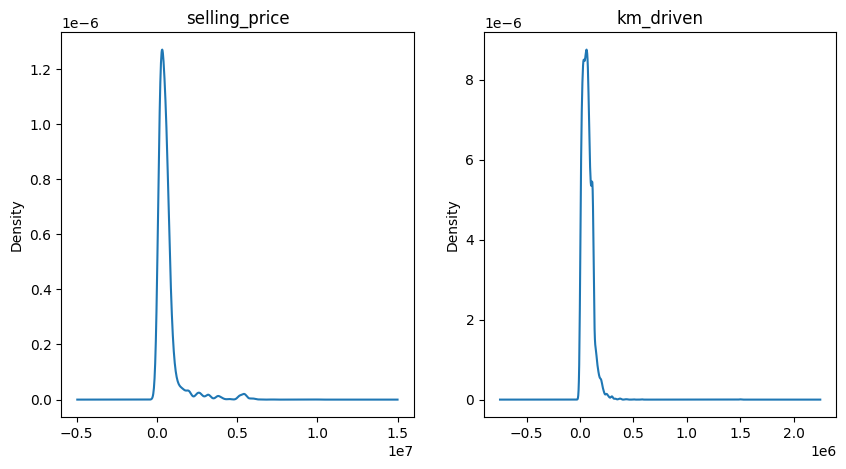

In [1078]:


columnas_con= ['selling_price', 'km_driven']

fig, axs = plt.subplots(nrows=1, ncols=len(columnas_con), figsize=(10,5))
i=0
for column in columnas_con:
    axs[i].set_title(column)
    train_df[column].plot.kde(ax=axs[i])
    i+=1
    


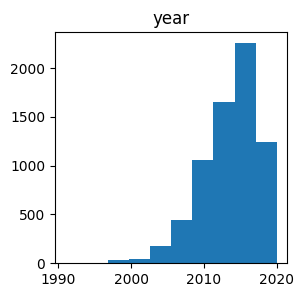

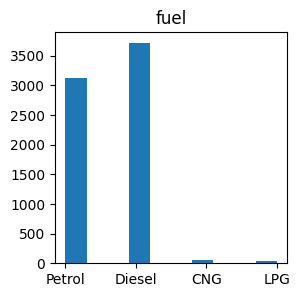

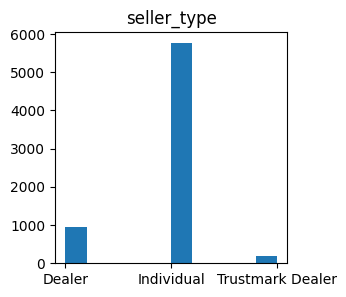

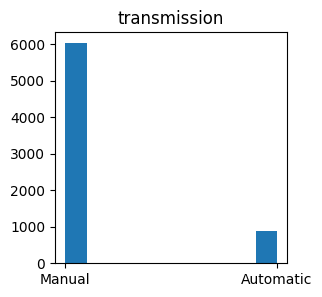

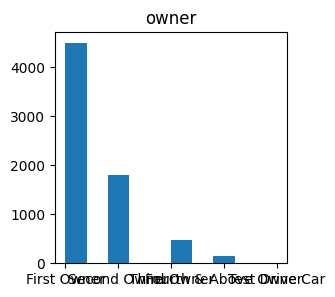

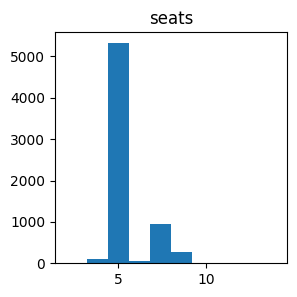

In [1085]:

columnas_disc= ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

i=0
for column in columnas_disc:
    fig, axs = plt.subplots(nrows=1, figsize=(3,3))
    plt.title(column)
    plt.hist(train_df[column])
    i+=1
# axs[1].set_title('StandardScaler')
# transformed_df = pd.DataFrame(StandardScaler().fit_transform(train_df[columnas_buscadas]))
# transformed_df.plot.kde(ax=axs[1], legend=False)

# Preprocesamiento

In [ ]:
def applytorque(row):
    print(row)
    return re.findall(r"-?(\d+(\.?\d+))", str(row))[0][0]
    

def preproceso(train_df):
    # Eliminamos los datos nulos (al revisarlo solo existe una fila con datos nulos)
    train_df.dropna(inplace=True)
    # Obtenemos la primera palabara del nombre del coche para obtener un dato dicreto limitado sobre la marca del coche
    train_df['marca'] = train_df['name'].str.split().str[0]
    # Eliminamos las medidas para hacer numericos los campos implicados (asegurandonos que todas las filas tengan la misma medida)
    train_df['engine'] = train_df['engine'].str.split().str[0]
    train_df['max_power'] = train_df['max_power'].str.split().str[0]
    train_df['mileage'] = train_df['mileage'].str.split().str[0]
    # Para la columna torque se pueden obtener el torque en Nm y las Revoluciones Por Minuto, separamos los datos en campos distintos y para el RPM elegimos el valor mas alto si hay un intervalo 
    regex = train_df.torque.str.findall(r"-?(\d+(\.?\d+))")
    train_df['torque'] = [i[0][0] for i in regex]
    train_df['RPM'] = [i[-1][0] for i in regex]
    # Transformamos en numericos los datos dicretos (si solo tienen 2 valores OneHotEncoder por velocidad, sino OrdinalEncoder)
    columns_to_encode = ['fuel', 'seller_type', 'owner', 'marca']
    for column in columns_to_encode:
        train_df[column+'_encode'] = OrdinalEncoder().fit_transform(train_df[[column]])
    train_df[['Automatic','Manual']] = OneHotEncoder().fit_transform(train_df[['transmission']]).toarray()
    train_df[['engine','RPM','Automatic','Manual', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']] =train_df[['engine','RPM','Automatic','Manual', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']].astype(int)
    train_df[['mileage','max_power','torque','Manual']] = train_df[['mileage','max_power','torque','Manual']].astype(float)
    train_df = train_df.drop(columns='transmission')
    return train_df

In [ ]:
preproceso(train_df)

,id,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,marca,RPM,fuel_encode,seller_type_encode,owner_encode,marca_encode,Automatic,Manual
0,1,Chevrolet Spark 1.0 LT,2011,130000,68519,Petrol,Dealer,First Owner,16.20,995,62.10,90.30,5.0,Chevrolet,4200,3,0,0,4,0,1.0
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,1050000,70000,Diesel,Dealer,First Owner,22.32,1582,126.32,259.80,5.0,Hyundai,2750,1,0,0,11,0,1.0
2,3,Mahindra Scorpio S10 7 Seater,2016,1100000,60000,Diesel,Individual,First Owner,15.40,2179,120.00,280.00,7.0,Mahindra,2800,1,1,0,19,0,1.0
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,350000,10000,Petrol,Individual,Second Owner,20.30,998,68.05,94.14,5.0,Hyundai,3500,3,1,2,11,0,1.0
4,5,Maruti Swift Dzire VDI,2014,490000,50000,Diesel,Individual,First Owner,23.40,1248,74.00,190.00,5.0,Maruti,2000,1,1,0,20,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,6905,Hyundai i20 2015-2017 Asta Option 1.2,2016,650000,29000,Petrol,Individual,First Owner,18.60,1197,81.83,114.70,5.0,Hyundai,4000,3,1,0,11,0,1.0
6905,6906,Hyundai EON Sportz,2017,300000,10000,Petrol,Individual,First Owner,21.10,814,55.20,74.50,5.0,Hyundai,4000,3,1,0,11,0,1.0
6906,6907,Maruti Swift VDI Optional,2017,693000,58559,Diesel,Dealer,First Owner,25.20,1248,74.00,190.00,5.0,Maruti,2000,1,0,0,20,0,1.0
6907,6908,Maruti Baleno Alpha 1.2,2017,580000,20000,Petrol,Individual,First Owner,21.40,1197,83.10,115.00,5.0,Maruti,4000,3,1,0,20,0,1.0


In [ ]:

for column in ['fuel', 'seller_type', 'owner', 'marca']:
    print(train_df[[column,column+'_encode']].drop_duplicates())

       fuel  fuel_encode
0    Petrol            3
1    Diesel            1
201     CNG            0
468     LPG            2
         seller_type  seller_type_encode
0             Dealer                   0
2         Individual                   1
61  Trustmark Dealer                   2
                    owner  owner_encode
0             First Owner             0
3            Second Owner             2
11            Third Owner             4
86   Fourth & Above Owner             1
511        Test Drive Car             3
              marca  marca_encode
0         Chevrolet             4
1           Hyundai            11
2          Mahindra            19
4            Maruti            20
5              Ford             9
7            Datsun             6
8            Nissan            23
11            Honda            10
13             Tata            27
14            Lexus            17
19           Toyota            28
25            Force             8
35           Jaguar          

In [ ]:
preproceso(test_df)

,id,name,year,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,marca,RPM,fuel_encode,seller_type_encode,owner_encode,marca_encode,Automatic,Manual
0,1,Chevrolet Spark 1.0 LT,2011,68519,Petrol,Dealer,First Owner,16.20,995,62.10,90.30,5.0,Chevrolet,4200,3,0,0,2,0,1.0
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,70000,Diesel,Dealer,First Owner,22.32,1582,126.32,259.80,5.0,Hyundai,2750,1,0,0,8,0,1.0
2,3,Mahindra Scorpio S10 7 Seater,2016,60000,Diesel,Individual,First Owner,15.40,2179,120.00,280.00,7.0,Mahindra,2800,1,1,0,12,0,1.0
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,10000,Petrol,Individual,Second Owner,20.30,998,68.05,94.14,5.0,Hyundai,3500,3,1,2,8,0,1.0
4,5,Maruti Swift Dzire VDI,2014,50000,Diesel,Individual,First Owner,23.40,1248,74.00,190.00,5.0,Maruti,2000,1,1,0,13,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,Mahindra Xylo E4 BS III,2014,78000,Diesel,Individual,First Owner,11.68,2498,112.00,260.00,7.0,Mahindra,2200,1,1,0,12,0,1.0
809,810,Maruti Swift Dzire VDI,2016,75000,Diesel,Individual,Second Owner,26.59,1248,74.00,190.00,5.0,Maruti,2000,1,1,2,13,0,1.0
810,811,Maruti Swift VXI,2020,5000,Petrol,Individual,First Owner,21.21,1197,81.80,113.00,5.0,Maruti,4200,3,1,0,13,0,1.0
811,812,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,First Owner,17.01,1968,188.00,400.00,5.0,Audi,3000,1,0,0,0,1,0.0


# Pruebas de modelos

# Conclusiones

# Creación de *submission* para Kaggle